#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#Data Extraction/Scraping

In [ ]:
import zipfile
import os
import random

In [ ]:
zip_file = zipfile.ZipFile("/content/drive/MyDrive/Text Summarization/archive.zip")
all_files = [info.filename for info in zip_file.infolist() if info.filename.split('/')[1]==('News Articles')]
# selected_files = random.sample(all_files, int(0.5*len(all_files)))
df = pd.DataFrame({'Article_path': all_files})
zip_file.close()

In [ ]:
df['Summary_path']=[str(file.split('/')[0])+'/Summaries/'+str('/'.join(file.split('/')[2:])) for file in all_files]

In [ ]:
!mkdir -p "/content/drive/MyDrive/Text Summarization/articles"
!mkdir -p "/content/drive/MyDrive/Text Summarization/summaries"

In [ ]:
articles = df['Article_path'].tolist()
summaries = df['Summary_path'].tolist()
# Open the zip file
zip_file = zipfile.ZipFile("/content/drive/MyDrive/Text Summarization/archive.zip")

# Extract only the files whose paths are stored in the dataframe
for file_path in articles:
    zip_file.extract(file_path, "/content/drive/MyDrive/Text Summarization/articles")
for file_path in summaries:
    zip_file.extract(file_path, "/content/drive/MyDrive/Text Summarization/summaries")

In [ ]:
bbc_chunk=pd.DataFrame()
for index, row in df.iterrows():
  try:
    with open(str('/content/drive/MyDrive/Text Summarization/articles/')+row['Article_path'], 'r') as f:
      bbc_chunk.at[index, 'text'] = f.read()
    with open(str('/content/drive/MyDrive/Text Summarization/summaries/')+row['Summary_path'], 'r') as f:
      bbc_chunk.at[index, 'summary'] = f.read()
  except:
    print("error")

error


In [ ]:
# bbc_chunk=pd.read_csv('/content/drive/MyDrive/Text Summarization/bbc_chunk.csv')
bbc_chunk

,text,summary
0,Ad sales boost Time Warner profit\n\nQuarterly...,TimeWarner said fourth quarter sales rose 2% t...
1,Dollar gains on Greenspan speech\n\nThe dollar...,The dollar has hit its highest level against t...
2,Yukos unit buyer faces loan claim\n\nThe owner...,Yukos' owner Menatep Group says it will ask Ro...
3,High fuel prices hit BA's profits\n\nBritish A...,"Rod Eddington, BA's chief executive, said the ..."
4,Pernod takeover talk lifts Domecq\n\nShares in...,Pernod has reduced the debt it took on to fund...
...,...,...
2220,BT program to beat dialler scams\n\nBT is intr...,BT is introducing two initiatives to help beat...
2221,Spam e-mails tempt net shoppers\n\nComputer us...,A third of them read unsolicited junk e-mail a...
2222,Be careful how you code\n\nA new European dire...,This goes to the heart of the European project...
2223,US cyber security chief resigns\n\nThe man mak...,Amit Yoran was director of the National Cyber ...


#Data Preparation

In [ ]:
df_wikihowAll=pd.read_csv('/content/drive/MyDrive/Text Summarization/wikihowAll.csv')
df_wikihowAll

,headline,title,text
0,"\nKeep related supplies in the same area.,\nMa...",How to Be an Organized Artist1,"If you're a photographer, keep all the necess..."
1,\nCreate a sketch in the NeoPopRealist manner ...,How to Create a Neopoprealist Art Work,See the image for how this drawing develops s...
2,"\nGet a bachelor’s degree.,\nEnroll in a studi...",How to Be a Visual Effects Artist1,It is possible to become a VFX artist without...
3,\nStart with some experience or interest in ar...,How to Become an Art Investor,The best art investors do their research on t...
4,"\nKeep your reference materials, sketches, art...",How to Be an Organized Artist2,"As you start planning for a project or work, ..."
...,...,...,...
215360,\nConsider changing the spelling of your name....,How to Pick a Stage Name3,"If you have a name that you like, you might f..."
215361,"\nTry out your name.,\nDon’t legally change yo...",How to Pick a Stage Name4,Your name might sound great to you when you s...
215362,"\nUnderstand the process of relief printing.,\...",How to Identify Prints1,Relief printing is the oldest and most tradit...
215363,\nUnderstand the process of intaglio printing....,How to Identify Prints2,"Intaglio is Italian for ""incis­ing,"" and corr..."


In [ ]:
df_wikihowAll.drop('title', axis=1, inplace=True)

In [ ]:
df_wikihowAll_chunk_train, df_wikihowAll_chunk_test = pd.DataFrame(), pd.DataFrame()
# df_wikihowAll_chunk = df_wikihowAll.sample(n=int(df_wikihowAll.shape[0]*0.8), random_state=42)
# df_wikihowAll_chunk
from sklearn.model_selection import train_test_split
df_wikihowAll_chunk_train['text'], df_wikihowAll_chunk_test['text'], df_wikihowAll_chunk_train['summary'], df_wikihowAll_chunk_test['summary'] = train_test_split(df_wikihowAll['text'], df_wikihowAll['headline'], random_state=2401, test_size=0.25)

In [ ]:
df_wikihowAll_chunk_train

,text,summary
202967,"Pour it onto a plate.\n\n,, If not, dip it in...","\nAcquire loose glitter.,\nTake a piece of dou..."
212229,"Before you start making your fake braces, you...","\nGather your materials.,\nPull your bobby pin..."
111715,It’s a yellow app with the outline of a ghost...,"\nOpen Snapchat.,\nTap the Chat icon.,\nSwipe ..."
191424,\n\n\nIf you want to sell new merchandise you ...,"\nDecide if you want to sell new, used, vintag..."
28108,If your khaki dress is a little loose around ...,"\nDefine your waist with a belt.,\nThrow on a ..."
...,...,...
91098,It's easiest to knead dough on a flat surface...,"\nPrepare a surface for kneading.,\nCombine th..."
61707,Meeting your garbage man and helping them lif...,"\nGive them a hand with your garbage can.,\nPr..."
79257,Becoming a state licensed childcare provider ...,"\nDecide if you want a career in childcare.,\n..."
14162,"If it is a half day, you will not need to wor...","\nThe night before, pack your lunch or put you..."


In [ ]:
df_wikihowAll_chunk_test

,text,summary
181533,"When you start your cleaning business, you ca...",\nDecide to be a commercial or consumer-driven...
41458,Hostels are a very cheap way to stay and you ...,\nConsider looking for ways to stay at places ...
97865,"Otherwise, please create a new Excel workbook...",\nFor those who have completed the article and...
185323,", Affix the soft duster brush attachment to th...","\nClose the slats.\n\n,\nPrepare the vacuum cl..."
33893,", The side you don't want to use yet should be...",\nPart your hair as you would any other time y...
...,...,...
52578,Find the portal for Return of The Phantoms. C...,"\nGo to the Adventures.,\nTake a friend.,\nThe..."
67771,"Sometimes, people who rely too much on techno...","\nTry something new.,\nGet a hobby.,\nExercise..."
149305,"Updating the operating system, programs, and ...","\nCheck for updates.,\nLimit the number of pro..."
94480,Before going into a discussion about divorce ...,"\nAsk yourself some questions.,\nAccept your d..."


In [ ]:
df_news_summary_more=pd.read_csv('/content/drive/MyDrive/Text Summarization/news_summary_more.csv')
df_news_summary_more

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...
...,...,...
98396,CRPF jawan axed to death by Maoists in Chhatti...,A CRPF jawan was on Tuesday axed to death with...
98397,First song from Sonakshi Sinha's 'Noor' titled...,"'Uff Yeh', the first song from the Sonakshi Si..."
98398,'The Matrix' film to get a reboot: Reports,"According to reports, a new version of the 199..."
98399,Snoop Dogg aims gun at clown dressed as Trump ...,A new music video shows rapper Snoop Dogg aimi...


In [ ]:
df_news_summary_more_train, df_news_summary_more_test = pd.DataFrame(), pd.DataFrame()

In [ ]:
df_news_summary_more_train['text'], df_news_summary_more_test['text'], df_news_summary_more_train['summary'], df_news_summary_more_test['summary'] = train_test_split(df_news_summary_more['text'], df_news_summary_more['headlines'], random_state=2401, test_size=0.25)

In [ ]:
df_news_summary_more_train

,text,summary
26341,Slamming Pakistan Election Commission's decisi...,Won't tolerate any bid to 'engineer' elections...
26070,Students of a government school in Uttar Prade...,Students seen washing dishes at govt school in UP
36431,A total of three infants have died and six oth...,"3 infants die, 6 fall sick after vaccination d..."
87235,Minister of Road Transport and Highways Nitin ...,17 highways near borders to double up as airst...
75054,A hotel maid in Italy was shot in the stomach ...,Hotel maid shot as colleague mistakes real gun...
...,...,...
91098,DMK Working President MK Stalin on Sunday said...,Govt conducting selective raids against AIADMK...
61707,Iran is complying with the 2015 nuclear deal i...,Iran complying with 2015 nuclear deal: UN watc...
79257,Hollywood actor John Heard passed away at the ...,'Home Alone' actor John Heard passes away aged 71
14162,A mishap was averted on Tuesday after the pilo...,IndiGo pilot applies emergency brakes as vehic...


In [ ]:
df_news_summary_more_test

,text,summary
41528,"Actress Rani Mukerji, while speaking about mar...",Wanted to get married to someone I love and re...
73137,The Bombay High Court has said that razing bui...,Razing buildings near airport over height not ...
44620,At least five people were killed after a truck...,5 die as 3 vehicles collide on Mumbai-Goa Highway
49444,A man in China hired a digger to steal 500 ton...,Man steals and sells 800-metre stretch of road...
3036,Bandhan Bank on Monday announced it will acqui...,Bandhan Bank to buy HDFC's Gruh Finance in â¹...
...,...,...
42574,India's 18-year-old shooter Elavenil Valarivan...,"18-yr-old sets qualification record, wins gold..."
85591,India's largest lender SBI has said demonetisa...,Note ban to continue to cause economy slowdown...
23046,Two months after announcing its dating feature...,Facebook begins testing its dating feature
69048,Anushka Sharma has said that she enjoys wearin...,"I am not a slave to fashion, says Anushka Sharma"


In [ ]:
df_samsum_train=pd.read_json('/content/drive/MyDrive/Text Summarization/samsum_train.json')
df_samsum_train

,id,summary,dialogue
0,13862856,Hannah needs Betty's number but Amanda doesn't...,"Hannah: Hey, do you have Betty's number?\nAman..."
1,13729565,Eric and Rob are going to watch a stand-up on ...,Eric: MACHINE!\r\nRob: That's so gr8!\r\nEric:...
2,13680171,Lenny can't decide which trousers to buy. Bob ...,"Lenny: Babe, can you help me with something?\r..."
3,13729438,Emma will be home soon and she will let Will k...,"Will: hey babe, what do you want for dinner to..."
4,13828600,Jane is in Warsaw. Ollie and Jane has a party....,"Ollie: Hi , are you in Warsaw\r\nJane: yes, ju..."
...,...,...,...
814,13611902-1,Benjamin didn't come to see a basketball game ...,Alex: Were you able to attend Friday night's b...
815,13820989,The audition starts at 7.30 P.M. in Antena 3.,Jamilla: remember that the audition starts at ...
816,13717193,"Marta sent a file accidentally,","Marta: <file_gif>\r\nMarta: Sorry girls, I cli..."
817,13829115,There was a meet-and-greet with James Charles ...,Cora: Have you heard how much fuss British med...


In [ ]:
df_samsum_val=pd.read_json('/content/drive/MyDrive/Text Summarization/samsum_val.json')
df_samsum_val

,id,summary,dialogue
0,13817023,A will go to the animal shelter tomorrow to ge...,"A: Hi Tom, are you busy tomorrow’s afternoon?\..."
1,13716628,Emma and Rob love the advent calendar. Lauren ...,Emma: I’ve just fallen in love with this adven...
2,13829420,Madison is pregnant but she doesn't want to ta...,Jackie: Madison is pregnant\r\nJackie: but she...
3,13819648,Marla found a pair of boxers under her bed.,Marla: <file_photo>\r\nMarla: look what I foun...
4,13728448,Robert wants Fred to send him the address of t...,Robert: Hey give me the address of this music ...
...,...,...,...
813,13829423,Carla's date for graduation is on June 4th. Di...,Carla: I've got it...\r\nDiego: what?\r\nCarla...
814,13727710,Bev is going on the school trip with her son. ...,"Gita: Hello, this is Beti's Mum Gita, I wanted..."
815,13829261,Greg cheated on Julia. He apologises to her. R...,"Julia: Greg just texted me\r\nRobert: ugh, del..."
816,13680226,Marry broke her nail and has a party tomorrow....,"Marry: I broke my nail ;(\r\nTina: oh, no!\r\n..."


In [ ]:
df_samsum_test=pd.read_json('/content/drive/MyDrive/Text Summarization/samsum_test.json')
df_samsum_test

,id,summary,dialogue
0,13862856,Hannah needs Betty's number but Amanda doesn't...,"Hannah: Hey, do you have Betty's number?\nAman..."
1,13729565,Eric and Rob are going to watch a stand-up on ...,Eric: MACHINE!\r\nRob: That's so gr8!\r\nEric:...
2,13680171,Lenny can't decide which trousers to buy. Bob ...,"Lenny: Babe, can you help me with something?\r..."
3,13729438,Emma will be home soon and she will let Will k...,"Will: hey babe, what do you want for dinner to..."
4,13828600,Jane is in Warsaw. Ollie and Jane has a party....,"Ollie: Hi , are you in Warsaw\r\nJane: yes, ju..."
...,...,...,...
814,13611902-1,Benjamin didn't come to see a basketball game ...,Alex: Were you able to attend Friday night's b...
815,13820989,The audition starts at 7.30 P.M. in Antena 3.,Jamilla: remember that the audition starts at ...
816,13717193,"Marta sent a file accidentally,","Marta: <file_gif>\r\nMarta: Sorry girls, I cli..."
817,13829115,There was a meet-and-greet with James Charles ...,Cora: Have you heard how much fuss British med...


In [ ]:
df_samsum_train.drop('id', axis=1, inplace=True)
df_samsum_val.drop('id', axis=1, inplace=True)
df_samsum_test.drop('id', axis=1, inplace=True)

In [ ]:
df_samsum_train.rename(columns={'dialogue': 'text'}, inplace=True)
df_samsum_val.rename(columns={'dialogue': 'text'}, inplace=True)
df_samsum_test.rename(columns={'dialogue': 'text'}, inplace=True)

In [ ]:
df_samsum_train.sample(10)

,summary,text
293,Amanda and Peter don't like what the man in dr...,Amanda: have you seen the guy with dreads?\nPe...
96,Rob is doing shopping at the grocery store. An...,"Rob: hey, pick up your phone :)\nAnn: can't - ..."
98,"Eric, Samantha and Noah's professor is comment...","Eric: <file_video>, check it out :D\r\nSamanth..."
217,Malik and Samanta want to lose weight. They wi...,Malik: have you heard of that paleo diet?\r\nM...
190,Titus agrees to help Emely with a language exe...,Emely: Hey. Could u help me with one task? I h...
638,Lincoln has broken Hudson's toilet seat. Hudso...,Lincoln: I think I've broken your toilet seat....
177,Caroline and Megan play a guessing game - they...,"Caroline: ""I am this close to tugging on my te..."
401,Joe is going to watch Deadpool 2 with his fell...,"Joe: Yo\r\nPete: Yo, sup?\r\nJoe: Wanna come o..."
72,Anna organises a birthday's party on the 6th o...,"Natalie: Well well weeeeeell, I see somethings..."
511,Zariah has been suffering from back pain recen...,Dane: Morning\r\nZariah: Morning\r\nDane: How ...


##Train Data

In [ ]:
frames = [bbc_chunk, df_news_summary_more_train, df_wikihowAll_chunk_train, df_samsum_train, df_samsum_val]

In [ ]:
df = pd.concat(frames)

In [ ]:
df

,text,summary
0,Ad sales boost Time Warner profit\n\nQuarterly...,TimeWarner said fourth quarter sales rose 2% t...
1,Dollar gains on Greenspan speech\n\nThe dollar...,The dollar has hit its highest level against t...
2,Yukos unit buyer faces loan claim\n\nThe owner...,Yukos' owner Menatep Group says it will ask Ro...
3,High fuel prices hit BA's profits\n\nBritish A...,"Rod Eddington, BA's chief executive, said the ..."
4,Pernod takeover talk lifts Domecq\n\nShares in...,Pernod has reduced the debt it took on to fund...
...,...,...
813,Carla: I've got it...\r\nDiego: what?\r\nCarla...,Carla's date for graduation is on June 4th. Di...
814,"Gita: Hello, this is Beti's Mum Gita, I wanted...",Bev is going on the school trip with her son. ...
815,"Julia: Greg just texted me\r\nRobert: ugh, del...",Greg cheated on Julia. He apologises to her. R...
816,"Marry: I broke my nail ;(\r\nTina: oh, no!\r\n...",Marry broke her nail and has a party tomorrow....


##Test Data

In [ ]:
frames=[df_news_summary_more_test, df_wikihowAll_chunk_test, df_samsum_test]

In [ ]:
test=pd.concat(frames)
test

,text,summary
41528,"Actress Rani Mukerji, while speaking about mar...",Wanted to get married to someone I love and re...
73137,The Bombay High Court has said that razing bui...,Razing buildings near airport over height not ...
44620,At least five people were killed after a truck...,5 die as 3 vehicles collide on Mumbai-Goa Highway
49444,A man in China hired a digger to steal 500 ton...,Man steals and sells 800-metre stretch of road...
3036,Bandhan Bank on Monday announced it will acqui...,Bandhan Bank to buy HDFC's Gruh Finance in â¹...
...,...,...
814,Alex: Were you able to attend Friday night's b...,Benjamin didn't come to see a basketball game ...
815,Jamilla: remember that the audition starts at ...,The audition starts at 7.30 P.M. in Antena 3.
816,"Marta: <file_gif>\r\nMarta: Sorry girls, I cli...","Marta sent a file accidentally,"
817,Cora: Have you heard how much fuss British med...,There was a meet-and-greet with James Charles ...


#Data Preprocessing

In [ ]:
import re

Removing new line escape character

In [ ]:
def back_slash_n(text):
  return re.sub("\n","",text)
df['text']=df['text'].astype(str).apply(lambda x: back_slash_n(x))
df['summary']=df['summary'].astype(str).apply(lambda x: back_slash_n(x))
test['text']=test['text'].astype(str).apply(lambda x: back_slash_n(x))
test['summary']=test['summary'].astype(str).apply(lambda x: back_slash_n(x))

Removing extra comma after end line pointer

In [ ]:
def fix_extra_commas(text):
  return re.sub("\.,",". ",text)
df['text']=df['text'].astype(str).apply(lambda x: fix_extra_commas(x))
df['summary']=df['summary'].astype(str).apply(lambda x: fix_extra_commas(x))
test['text']=test['text'].astype(str).apply(lambda x: fix_extra_commas(x))
test['summary']=test['summary'].astype(str).apply(lambda x: fix_extra_commas(x))

Punctuation

In [ ]:
import re
def fix_puntuation(text):
  return re.sub("`","'",text)
df['text']=df['text'].astype(str).apply(lambda x: fix_puntuation(x))
df['summary']=df['summary'].astype(str).apply(lambda x: fix_puntuation(x))
test['text']=test['text'].astype(str).apply(lambda x: fix_puntuation(x))
test['summary']=test['summary'].astype(str).apply(lambda x: fix_puntuation(x))

Patterns like "< text >"

In [ ]:
def remove_angle_brackets(text):
    return re.sub("<.*?>", "", text)
df['text'] = df['text'].astype(str).apply(remove_angle_brackets)
df['summary'] = df['summary'].astype(str).apply(remove_angle_brackets)
test['text'] = test['text'].astype(str).apply(remove_angle_brackets)
test['summary'] = test['summary'].astype(str).apply(remove_angle_brackets)

In [ ]:
test.shape

(79262, 2)

Contractions

In [ ]:
!pip install contractions --quiet
import contractions
def fix_contraction(text):
  return contractions.fix(text)
df['text']=df['text'].astype(str).apply(lambda x: fix_contraction(x))
df['summary']=df['summary'].astype(str).apply(lambda x: fix_contraction(x))
test['text']=test['text'].astype(str).apply(lambda x: fix_contraction(x))
test['summary']=test['summary'].astype(str).apply(lambda x: fix_contraction(x))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 19.5 MB/s eta 0:00:00


Special characters

In [ ]:
def spl_char(text):
  return re.sub(r'[^\x00-\x7F]+', '', text)
df['text'] = df['text'].astype(str).apply(spl_char)
df['summary'] = df['summary'].astype(str).apply(spl_char)
test['text'] = test['text'].astype(str).apply(spl_char)
test['summary'] = test['summary'].astype(str).apply(spl_char)

Some of the data is in float which causes inconsistency

In [ ]:
# l=[]
# for i, row in df.iterrows():
#   if type(row['text'])==float:
#     l.append(i)
# len(l)

0

In [ ]:
# df.drop(l, axis=0, inplace=True)

In [ ]:
# l=[]
# for i, row in test.iterrows():
#   if type(row['summary'])==float:
#     l.append(i)
# len(l)

0

In [ ]:
# test.drop(l, axis=0, inplace=True)

Article and summary lengths

In [ ]:
article_sizes, summary_sizes = [], []
for i in range(df.shape[0]):
  article_sizes.append(len(df.iloc[i][0].split()))
  summary_sizes.append(len(df.iloc[i][1].split()))

In [ ]:
max(article_sizes), min(article_sizes), np.mean(article_sizes)

(11964, 0, 310.05090223426316)

In [ ]:
max(summary_sizes), min(summary_sizes), np.mean(summary_sizes)

(3368, 0, 43.77458358418623)

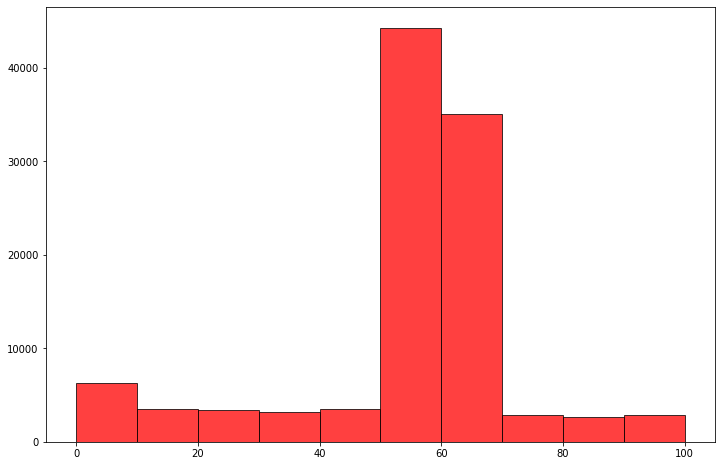

In [ ]:
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(article_sizes, range=(0,100), bins=10, edgecolor='black', color="red", alpha=0.75)
# Show the plot
plt.show()

In [ ]:
# print(n.tolist())

[11981.0, 48342.0, 42355.0, 7377.0, 7333.0, 7549.0, 7849.0, 7866.0, 7892.0, 7814.0]


In [ ]:
test_article_sizes, test_summary_sizes = [], []
for i in range(test.shape[0]):
  test_article_sizes.append(len(test.iloc[i][0].split()))
  test_summary_sizes.append(len(test.iloc[i][1].split()))

In [ ]:
max(test_article_sizes), min(test_article_sizes), np.mean(test_article_sizes)

(6796, 1, 309.77809038379047)

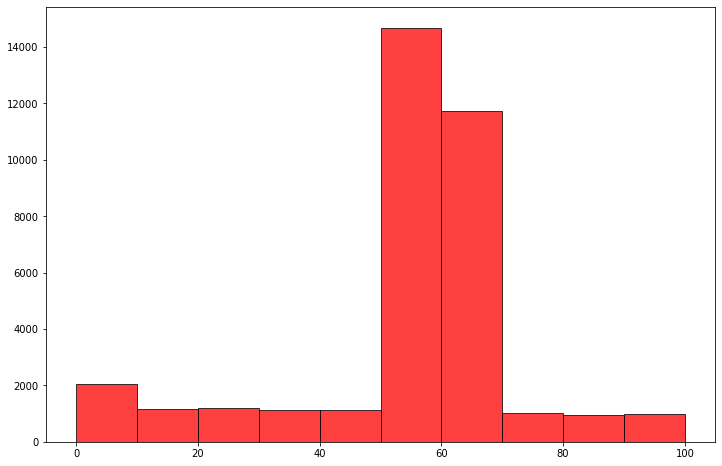

In [ ]:
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(test_article_sizes, range=(0,100), bins=10, edgecolor='black', color="red", alpha=0.75)
# Show the plot
plt.show()

In [ ]:
# np.mean(df['text'].str.split().apply(len))

316.2521057389306

Removing those articles which are of less than 30 words and greater than 350

In [ ]:
# Split the text column into words
df['word_count'] = df['text'].str.split().apply(len)

# Remove articles with word count less than 30 or greater than 350
df = df[(df['word_count'] >= 30) & (df['word_count'] <= 350)]

# Drop the word_count column
df.drop('word_count', axis=1, inplace=True)

df

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,text,summary
2,Yukos unit buyer faces loan claimThe owners of...,Yukos' owner Menatep Group says it will ask Ro...
4,Pernod takeover talk lifts DomecqShares in UK ...,Pernod has reduced the debt it took on to fund...
5,Japan narrowly escapes recessionJapan's econom...,"On an annual basis, the data suggests annual g..."
6,Jobs growth still slow in the USThe US created...,The job gains mean that President Bush can cel...
7,"India calls for fair trade rulesIndia, which a...",At a conference on developing enterprise hoste...
...,...,...
813,Carla: I've got it...\rDiego: what?\rCarla: my...,Carla's date for graduation is on June 4th. Di...
814,"Gita: Hello, this is Beti's Mum Gita, I wanted...",Bev is going on the school trip with her son. ...
815,"Julia: Greg just texted me\rRobert: ugh, delet...",Greg cheated on Julia. He apologises to her. R...
816,"Marry: I broke my nail ;(\rTina: oh, no!\rMarr...",Marry broke her nail and has a party tomorrow....


In [ ]:
# Split the text column into words
test['word_count'] = test['text'].str.split().apply(len)

# Remove articles with word count less than 30 or greater than 350
test = test[(test['word_count'] >= 30) & (test['word_count'] <= 350)]

# Drop the word_count column
test.drop('word_count', axis=1, inplace=True)

test

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,text,summary
41528,"Actress Rani Mukerji, while speaking about mar...",Wanted to get married to someone I love and re...
73137,The Bombay High Court has said that razing bui...,Razing buildings near airport over height not ...
44620,At least five people were killed after a truck...,5 die as 3 vehicles collide on Mumbai-Goa Highway
49444,A man in China hired a digger to steal 500 ton...,Man steals and sells 800-metre stretch of road...
3036,Bandhan Bank on Monday announced it will acqui...,"Bandhan Bank to buy HDFC's Gruh Finance in 81,..."
...,...,...
812,Michelle: OMG! OMG! OMG! Got news!\rRachel: C'...,Monica had sex with Ross at an office party tw...
813,Luke: wow I got my ass kicked surfing today. 0...,Luke will go surfing at 2:22 pm tomorrow.
814,Alex: Were you able to attend Friday night's b...,Benjamin didn't come to see a basketball game ...
817,Cora: Have you heard how much fuss British med...,There was a meet-and-greet with James Charles ...


In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
test.reset_index(drop=True, inplace=True)

In [ ]:
df.shape, test.shape

((157810, 2), (52539, 2))

In [ ]:
df

,text,summary
0,Yukos unit buyer faces loan claimThe owners of...,Yukos' owner Menatep Group says it will ask Ro...
1,Pernod takeover talk lifts DomecqShares in UK ...,Pernod has reduced the debt it took on to fund...
2,Japan narrowly escapes recessionJapan's econom...,"On an annual basis, the data suggests annual g..."
3,Jobs growth still slow in the USThe US created...,The job gains mean that President Bush can cel...
4,"India calls for fair trade rulesIndia, which a...",At a conference on developing enterprise hoste...
...,...,...
157805,Carla: I've got it...\rDiego: what?\rCarla: my...,Carla's date for graduation is on June 4th. Di...
157806,"Gita: Hello, this is Beti's Mum Gita, I wanted...",Bev is going on the school trip with her son. ...
157807,"Julia: Greg just texted me\rRobert: ugh, delet...",Greg cheated on Julia. He apologises to her. R...
157808,"Marry: I broke my nail ;(\rTina: oh, no!\rMarr...",Marry broke her nail and has a party tomorrow....


In [ ]:
test

,text,summary
0,"Actress Rani Mukerji, while speaking about mar...",Wanted to get married to someone I love and re...
1,The Bombay High Court has said that razing bui...,Razing buildings near airport over height not ...
2,At least five people were killed after a truck...,5 die as 3 vehicles collide on Mumbai-Goa Highway
3,A man in China hired a digger to steal 500 ton...,Man steals and sells 800-metre stretch of road...
4,Bandhan Bank on Monday announced it will acqui...,"Bandhan Bank to buy HDFC's Gruh Finance in 81,..."
...,...,...
52534,Michelle: OMG! OMG! OMG! Got news!\rRachel: C'...,Monica had sex with Ross at an office party tw...
52535,Luke: wow I got my ass kicked surfing today. 0...,Luke will go surfing at 2:22 pm tomorrow.
52536,Alex: Were you able to attend Friday night's b...,Benjamin didn't come to see a basketball game ...
52537,Cora: Have you heard how much fuss British med...,There was a meet-and-greet with James Charles ...


In [ ]:
test.isnull().sum()

text       0
summary    0
dtype: int64

In [ ]:
df.to_csv('/content/drive/MyDrive/Text Summarization/text_summarization_train.csv', index=False)
test.to_csv('/content/drive/MyDrive/Text Summarization/text_summarization_test.csv', index=False)

In [ ]:
dtypes=[]
for i, r in df.iterrows():
  if type(r['text']) not in dtypes:
    dtypes.append(type(r['text']))
dtypes

[str]

#Importing Dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Text Summarization/text_summarization_train.csv', low_memory=False, lineterminator='\n')

In [ ]:
df

,text,summary
0,Yukos unit buyer faces loan claimThe owners of...,Yukos' owner Menatep Group says it will ask Ro...
1,Pernod takeover talk lifts DomecqShares in UK ...,Pernod has reduced the debt it took on to fund...
2,Japan narrowly escapes recessionJapan's econom...,"On an annual basis, the data suggests annual g..."
3,Jobs growth still slow in the USThe US created...,The job gains mean that President Bush can cel...
4,"India calls for fair trade rulesIndia, which a...",At a conference on developing enterprise hoste...
...,...,...
157805,Carla: I've got it...\rDiego: what?\rCarla: my...,Carla's date for graduation is on June 4th. Di...
157806,"Gita: Hello, this is Beti's Mum Gita, I wanted...",Bev is going on the school trip with her son. ...
157807,"Julia: Greg just texted me\rRobert: ugh, delet...",Greg cheated on Julia. He apologises to her. R...
157808,"Marry: I broke my nail ;(\rTina: oh, no!\rMarr...",Marry broke her nail and has a party tomorrow....


In [ ]:
test=pd.read_csv('/content/drive/MyDrive/Text Summarization/text_summarization_test.csv', low_memory=False, lineterminator='\n')

In [ ]:
test

,text,summary
0,"Actress Rani Mukerji, while speaking about mar...",Wanted to get married to someone I love and re...
1,The Bombay High Court has said that razing bui...,Razing buildings near airport over height not ...
2,At least five people were killed after a truck...,5 die as 3 vehicles collide on Mumbai-Goa Highway
3,A man in China hired a digger to steal 500 ton...,Man steals and sells 800-metre stretch of road...
4,Bandhan Bank on Monday announced it will acqui...,"Bandhan Bank to buy HDFC's Gruh Finance in 81,..."
...,...,...
52534,Michelle: OMG! OMG! OMG! Got news!\rRachel: C'...,Monica had sex with Ross at an office party tw...
52535,Luke: wow I got my ass kicked surfing today. 0...,Luke will go surfing at 2:22 pm tomorrow.
52536,Alex: Were you able to attend Friday night's b...,Benjamin didn't come to see a basketball game ...
52537,Cora: Have you heard how much fuss British med...,There was a meet-and-greet with James Charles ...


# *PageRank*

In [ ]:
import numpy as np
import networkx as nx
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
!pip install --upgrade scipy networkx --quiet

In [ ]:
import scipy
scipy.__version__

'1.10.0'

In [ ]:
def summarize_text(text, n=60):
    # Tokenize text into sentences
    sentences = sent_tokenize(text)
    
    # Build a graph where each sentence is a node
    graph = nx.Graph()
    graph.add_nodes_from(sentences)
    
    # Compute similarity scores between sentences
    similarity_matrix = np.zeros((len(sentences), len(sentences)))
    for i, s1 in enumerate(sentences):
        for j, s2 in enumerate(sentences):
            similarity_matrix[i][j] = text_similarity(s1, s2)
    
    # Add edges between sentences based on similarity scores
    for i in range(len(sentences)):
        for j in range(i+1, len(sentences)):
            if similarity_matrix[i][j] > 0:
                graph.add_edge(sentences[i], sentences[j], weight=similarity_matrix[i][j])
    
    # Run PageRank algorithm on the graph
    scores = nx.pagerank(graph)
    
    # Select the top n sentences based on PageRank scores
    ranked_sentences = sorted(((scores[s], s) for s in sentences), reverse=True)
    summary = " ".join([s[1] for s in ranked_sentences[:n]])
    return summary

In [ ]:
def text_similarity(summary, reference):
  from sklearn.metrics.pairwise import cosine_similarity
  from sklearn.feature_extraction.text import CountVectorizer
  from sklearn.metrics import jaccard_score
  # Convert text to a matrix of token counts
  vectors = [summary, reference]
  vectors = CountVectorizer().fit_transform(vectors)

  # Calculate cosine similarity
  cos_sim = cosine_similarity(vectors[0], vectors[1])[0][0]
  print(cos_sim)

In [ ]:
df['text'].iloc[0]

'Ad sales boost Time Warner profitQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL\'s 

In [ ]:
df['summary'].iloc[0]

"TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn.For the full-year, TimeWarner posted a profit of $3.36bn, up 27% from its 2003 performance, while revenues grew 6.4% to $42.09bn.Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues.Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.For 2005, TimeWarner is projecting operating earnings growth of around 5%, and also expects higher revenue and wider profit margins.It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters.Time Warner's fourth quarter profits were slightly better than analysts' expectations."

In [ ]:
sentences = sent_tokenize(df['text'].iloc[0])

# Build a graph where each sentence is a node
graph = nx.Graph()
graph.add_nodes_from(sentences)

In [ ]:
# Compute similarity scores between sentences
similarity_matrix = np.zeros((len(sentences), len(sentences)))
for i, s1 in enumerate(sentences):
    for j, s2 in enumerate(sentences):
        similarity_matrix[i][j] = text_similarity(s1, s2)

0.9999999999999998
0.27801921874276636
0.2645360014558559
0.03806934938134405
0.2566635011696726
0.23643312187173018
0.300964632714423
0.30096463271442303
0.3575277429186744
0.31524416249564025
0.10323001737691673
0.2923656432082966
0.23643312187173018
0.2608360150191666
0.20646003475383348
0.2833152987899314
0.27801921874276636
1.0000000000000002
0.048795003647426664
0.0
0.12309149097933274
0.12598815766974242
0.19245008972987526
0.24056261216234406
0.08164965809277261
0.18898223650461363
0.049507377148833714
0.16495721976846453
0.12598815766974242
0.14433756729740643
0.049507377148833714
0.0
0.2645360014558559
0.048795003647426664
1.0000000000000002
0.10690449676496976
0.10811249552346706
0.18442777839082936
0.14085904245475275
0.2253744679276044
0.14342743312012723
0.14754222271266348
0.11595420713048966
0.2173253797873328
0.11065666703449761
0.19720265943665385
0.20291986247835692
0.26519741765271837
0.03806934938134405
0.0
0.10690449676496976
0.9999999999999999
0.0
0.1380131118684

In [ ]:
# Add edges between sentences based on similarity scores
for i in range(len(sentences)):
    for j in range(i+1, len(sentences)):
        if similarity_matrix[i][j] > 0:
            graph.add_edge(sentences[i], sentences[j], weight=similarity_matrix[i][j])

In [ ]:
# Run PageRank algorithm on the graph
scores = nx.pagerank(graph)

# Select the top n sentences based on PageRank scores
ranked_sentences = sorted(((scores[s], s) for s in sentences), reverse=True)
summary = " ".join([s[1] for s in ranked_sentences[:5]])
summary = ' '.join(summary.split()[:60])
summary

"TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. TimeWarner also has to restate 2000 and 2003 results following a probe by the US Securities Exchange Commission (SEC), which is close to concluding.Time Warner's fourth quarter profits were slightly better than analysts' expectations. The company said it was unable to estimate the amount it needed to set aside"

In [ ]:
!pip install rouge --quiet

In [ ]:
from rouge import Rouge
rouge=Rouge()
rouge.get_scores(summary, df['summary'].iloc[0])

[{'rouge-1': {'r': 0.2962962962962963,
   'p': 0.6037735849056604,
   'f': 0.3975155235338143},
  'rouge-2': {'r': 0.15827338129496402,
   'p': 0.36065573770491804,
   'f': 0.21999999576050006},
  'rouge-l': {'r': 0.2777777777777778,
   'p': 0.5660377358490566,
   'f': 0.3726708030369199}}]

#DEEP LEARNING

In [ ]:
# from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=df['text'],test['text'],df['summary'],test['summary']

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((157810,), (52539,), (157810,), (52539,))

##*Tokenization*

In [ ]:
# !pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###Text

In [ ]:
#Lets tokenize the text to get the vocab count , you can use Spacy here also
from keras.preprocessing.text import Tokenizer 
from keras_preprocessing.sequence import pad_sequences

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(df['text'])

In [ ]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 66.43321772941961
Total Coverage of rare words: 0.7983653594047911


**RARE WORD ANALYSIS FOR X i.e 'text'**
* tot_cnt gives the size of vocabulary (which means every unique words in the text)

* cnt gives me the no. of rare words whose count falls below threshold

* tot_cnt - cnt gives me the top most common words

In [ ]:
#Model to summarize the text between 0-15 words for Summary and 0-100 words for Text
max_text_len=350
max_summary_len=60

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(x_train)

#convert text sequences into integer sequences (i.e one-hot encodeing all the words)
x_train_seq = x_tokenizer.texts_to_sequences(x_train) 
x_test_seq = x_tokenizer.texts_to_sequences(x_test)

#padding zero upto maximum length
x_train = pad_sequences(x_train_seq,  maxlen=max_text_len, padding='post')
x_test = pad_sequences(x_test_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc = x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 59912


###Summary

In [ ]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(y_train)

In [ ]:
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 69.95065147158022
Total Coverage of rare words: 2.0398093497834906


**RARE WORD ANALYSIS FOR Y i.e 'summary'**
* tot_cnt gives the size of vocabulary (which means every unique words in the text)

* cnt gives me the no. of rare words whose count falls below threshold

* tot_cnt - cnt gives me the top most common words

In [ ]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(y_train)

#convert text sequences into integer sequences (i.e one hot encode the text in Y)
y_train_seq    =   y_tokenizer.texts_to_sequences(y_train) 
y_test_seq   =   y_tokenizer.texts_to_sequences(y_test) 

#padding zero upto maximum length
y_train = pad_sequences(y_train_seq, maxlen=max_summary_len, padding='post')
y_test = pad_sequences(y_test_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1
print("Size of vocabulary in Y = {}".format(y_voc))

Size of vocabulary in Y = 25393


In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((157810, 350), (52539, 350), (157810, 60), (52539, 60))

##Modelling

In [ ]:
from keras import backend as K 
import gensim
from numpy import *
import numpy as np
import pandas as pd 
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer 
from keras_preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

In [ ]:
latent_dim = 300
embedding_dim=200
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Embedding(x_voc, embedding_dim, trainable=True, input_length=max_text_len))
# # model.add(tf.keras.layers.SpatialDropout1D(0.2))
# model.add(tf.keras.layers.LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4))
# # model.add(tf.keras.layers.SpatialDropout1D(0.2))
# model.add(tf.keras.layers.LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4))
# model.add(tf.keras.layers.LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4))
# # model.add(tf.keras.layers.SpatialDropout1D(0.2))
# model.add(tf.keras.layers.LSTM(8, dropout=0.2, recurrent_dropout=0.2, return_sequences=False))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
# model.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(gamma=2,from_logits=False),optimizer=keras.optimizers.Adam(learning_rate=0.002529),metrics=[tf.keras.metrics.BinaryAccuracy()])
# model.summary()

In [ ]:
# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 350)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 350, 200)     11982400    ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 350, 300),   601200      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                              

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
history=model.fit(([x_train,y_train[:,:-1]]),
                  (y_train.reshape(y_train.shape[0],y_train.shape[1], 1)[:,1:]),
                  epochs=50,
                  callbacks=[es],
                  batch_size=128, 
                  validation_data=([x_test,y_test[:,:-1]], y_test.reshape(y_test.shape[0],y_test.shape[1], 1)[:,1:]))

Epoch 1/50


In [ ]:
plt.figure(figsize=(12,6))
epochs = len(history.history['loss'])
plt.plot(range(epochs),history.history['loss'],label='Training loss',color='r')
plt.plot(range(epochs),history.history['val_loss'],label='Validation loss',color='black')

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()  
plt.title('Loss v/s Time')

plt.show()

In [ ]:
model.evaluate(x_test,y_test)